## Read me at the begining

This the jupyter notebook for building the LSTM model to predict bitcoin.

- Data preparetion
  - read the clean data
- Feature procese
  -  remove rows
- Modeling
  - Building a basic LSTM model
  - Experiments finding the best structure design of the LSTM(Automation programe to find best LSTM model for the target)
- Result
  - Calculate the RMSE and Plot the real vs predict graph

# 1. Data preparetion

In [ ]:
# neccessary library
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Dense, Reshape
# Experiments using CNN + LSTM
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Dense, Reshape
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping, ModelCheckpoint


import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:


file_path = '/content/drive/My Drive/CSCI567/data/Merged_Data.csv'
file_path_frb_h15_3 = '/content/drive/My Drive/CSCI567/data/FRB_H15-3.csv'
df = pd.read_csv(file_path)

# # Load the Merged_Data.csv file
# merged_data = pd.read_csv(file_path)

# # Load the FRB_H15-3.csv file, skipping initial metadata rows
# frb_h15_3_data = pd.read_csv(file_path_frb_h15_3, skiprows=5)
# print(frb_h15_3_data.columns)

# # Convert the 'Date' column in merged_data and 'Time Period' column in frb_h15_3_data to datetime objects
# merged_data['Date'] = pd.to_datetime(merged_data['Date'])
# frb_h15_3_data['Time Period'] = pd.to_datetime(frb_h15_3_data['Time Period'])

# # Merge the datasets on the time index
# merged_dataset = pd.merge(merged_data, frb_h15_3_data, left_on='Date', right_on='Time Period', how='left')

# # Drop the redundant 'Time Period' column after merge
# merged_dataset = merged_dataset.drop(columns=['Time Period'])

# # Displaying the first few rows of the merged dataset (optional)
# print(merged_dataset.head())

In [3]:
df.tail()

,Date,CPI_CPI,XRP_Open,XRP_High,XRP_Low,XRP_Close,XRP_Adj Close,XRP_Volume,DJIA_DJIA,STICKY_STICKY,...,VIX_LOW,VIX_CLOSE,real_interest_rate_10Y_real_interest_rate_10Y,SP500_SP500,BNB_Open,BNB_High,BNB_Low,BNB_Close,BNB_Adj Close,BNB_Volume
3123,2023-04-07,302.918,0.503306,0.514165,0.499108,0.513736,0.513736,1.060409e+09,33535.900000,6.322749,...,18.495,18.5425,1.443914,4107.07,312.453949,312.865265,309.983429,310.699493,310.699493,478098163.0
3124,2023-04-08,302.918,0.513730,0.513730,0.504441,0.505716,0.505716,5.876411e+08,33552.773333,6.322749,...,18.640,18.6850,1.443914,4107.75,310.665314,312.683258,310.388031,310.634735,310.634735,461767801.0
3125,2023-04-09,302.918,0.505694,0.509143,0.500927,0.505834,0.505834,5.505828e+08,33569.646667,6.322749,...,18.785,18.8275,1.443914,4108.43,310.659058,313.613159,309.884583,312.872253,312.872253,465627007.0
3126,2023-04-10,302.918,0.505793,0.519673,0.501259,0.518318,0.518318,9.143895e+08,33586.520000,6.322749,...,18.930,18.9700,1.443914,4109.11,312.868134,318.379059,311.811798,318.379059,318.379059,565754261.0
3127,2023-04-11,302.918,0.518112,0.525884,0.513525,0.514492,0.514492,1.276552e+09,33684.790000,6.322749,...,18.560,19.1000,1.443914,4108.94,318.537689,332.877777,318.155609,325.693817,325.693817,915240512.0


In [4]:
#print the dataframe columns
print(df.columns)

Index(['Date', 'CPI_CPI', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close',
       'XRP_Adj Close', 'XRP_Volume', 'DJIA_DJIA', 'STICKY_STICKY',
       'Ethereum_Open', 'Ethereum_High', 'Ethereum_Low', 'Ethereum_Close',
       'Ethereum_Adj Close', 'Ethereum_Volume', 'Litecoin_Open',
       'Litecoin_High', 'Litecoin_Low', 'Litecoin_Close', 'Litecoin_Adj Close',
       'Litecoin_Volume', 'Bitcoin_Open', 'Bitcoin_High', 'Bitcoin_Low',
       'Bitcoin_Close', 'Bitcoin_Adj Close', 'Bitcoin_Volume', 'Cardano_Open',
       'Cardano_High', 'Cardano_Low', 'Cardano_Close', 'Cardano_Adj Close',
       'Cardano_Volume', '10Y_Inflation_10Y_Inflation', 'VIX_OPEN', 'VIX_HIGH',
       'VIX_LOW', 'VIX_CLOSE', 'real_interest_rate_10Y_real_interest_rate_10Y',
       'SP500_SP500', 'BNB_Open', 'BNB_High', 'BNB_Low', 'BNB_Close',
       'BNB_Adj Close', 'BNB_Volume'],
      dtype='object')


In [5]:
# delelte the rows with 0
df_filtered_zero = df.loc[~(df == 0).any(axis=1)]

# print the dataframe
df_filtered_zero

,Date,CPI_CPI,XRP_Open,XRP_High,XRP_Low,XRP_Close,XRP_Adj Close,XRP_Volume,DJIA_DJIA,STICKY_STICKY,...,VIX_LOW,VIX_CLOSE,real_interest_rate_10Y_real_interest_rate_10Y,SP500_SP500,BNB_Open,BNB_High,BNB_Low,BNB_Close,BNB_Adj Close,BNB_Volume
1149,2017-11-10,247.284,0.218256,0.219068,0.205260,0.206483,0.206483,1.410330e+08,23422.210000,2.115031,...,10.500000,11.2900,0.752190,2582.300000,2.007730,2.069470,1.644780,1.796840,1.796840,11155000.0
1150,2017-11-11,247.284,0.205948,0.214456,0.205459,0.210430,0.210430,1.345030e+08,23428.040000,2.115031,...,10.666667,11.3600,0.752190,2583.146667,1.786280,1.917750,1.614290,1.670470,1.670470,8178150.0
1151,2017-11-12,247.284,0.210214,0.210214,0.195389,0.197339,0.197339,2.511750e+08,23433.870000,2.115031,...,10.833333,11.4300,0.752190,2583.993333,1.668890,1.672800,1.462560,1.519690,1.519690,15298700.0
1152,2017-11-13,247.284,0.197472,0.204081,0.197456,0.203442,0.203442,1.325670e+08,23439.700000,2.115031,...,11.000000,11.5000,0.752190,2584.840000,1.526010,1.735020,1.517600,1.686620,1.686620,12238800.0
1153,2017-11-14,247.284,0.203679,0.213693,0.203679,0.209825,0.209825,1.273610e+08,23409.470000,2.115031,...,11.450000,11.5900,0.752190,2578.870000,1.689280,1.735370,1.568270,1.592580,1.592580,7829600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,2023-04-07,302.918,0.503306,0.514165,0.499108,0.513736,0.513736,1.060409e+09,33535.900000,6.322749,...,18.495000,18.5425,1.443914,4107.070000,312.453949,312.865265,309.983429,310.699493,310.699493,478098163.0
3124,2023-04-08,302.918,0.513730,0.513730,0.504441,0.505716,0.505716,5.876411e+08,33552.773333,6.322749,...,18.640000,18.6850,1.443914,4107.750000,310.665314,312.683258,310.388031,310.634735,310.634735,461767801.0
3125,2023-04-09,302.918,0.505694,0.509143,0.500927,0.505834,0.505834,5.505828e+08,33569.646667,6.322749,...,18.785000,18.8275,1.443914,4108.430000,310.659058,313.613159,309.884583,312.872253,312.872253,465627007.0
3126,2023-04-10,302.918,0.505793,0.519673,0.501259,0.518318,0.518318,9.143895e+08,33586.520000,6.322749,...,18.930000,18.9700,1.443914,4109.110000,312.868134,318.379059,311.811798,318.379059,318.379059,565754261.0


# 2. Feature procese

### Cleaned data


In [6]:
df_filtered_zero_copy_1 = df_filtered_zero.copy()
df_filtered_zero_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 1149 to 3127
Data columns (total 47 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           1979 non-null   object 
 1   CPI_CPI                                        1979 non-null   float64
 2   XRP_Open                                       1979 non-null   float64
 3   XRP_High                                       1979 non-null   float64
 4   XRP_Low                                        1979 non-null   float64
 5   XRP_Close                                      1979 non-null   float64
 6   XRP_Adj Close                                  1979 non-null   float64
 7   XRP_Volume                                     1979 non-null   float64
 8   DJIA_DJIA                                      1979 non-null   float64
 9   STICKY_STICKY                                  19

<Axes: >

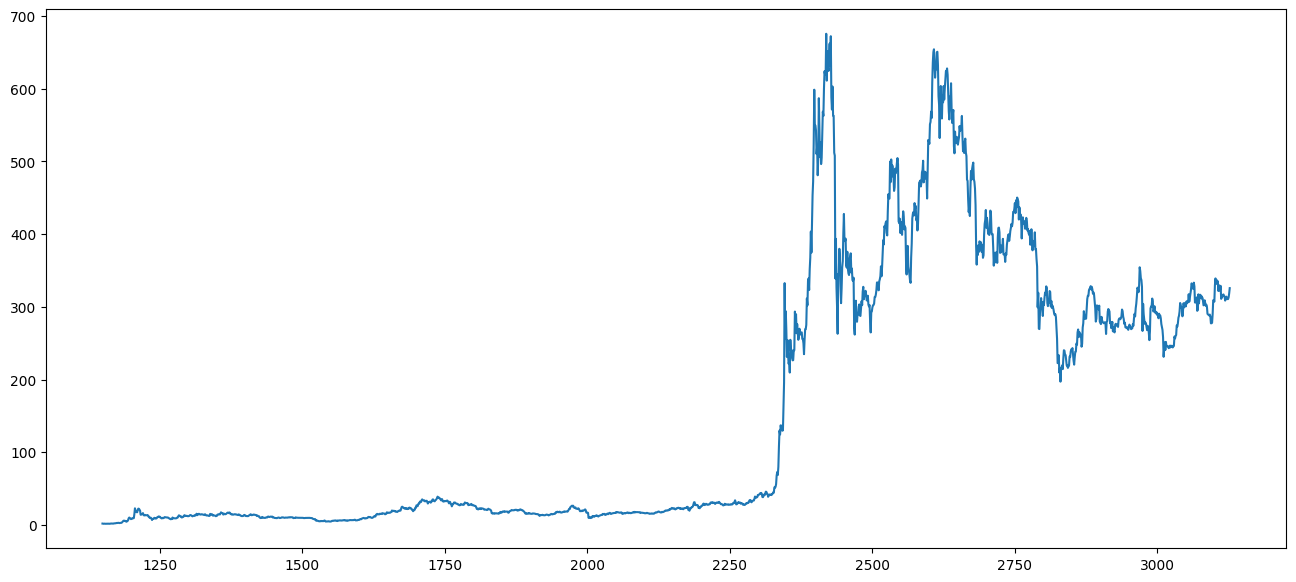

In [7]:
df_filtered_zero_copy_1.BNB_Close.plot(figsize = (16,7))

# 3. Modeling

## 3.1 LSTM

### Normalize the data

In [9]:
# normalization for further lstm traing

features = df_filtered_zero_copy_1.iloc[:, 1:]
features.columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# only for close price
# scaler_bitclose is a MinMaxScaler only for close price
close_prices = df_filtered_zero_copy_1['Bitcoin_Close'].values.reshape(-1, 1)
scaler_bitclose = MinMaxScaler(feature_range=(0, 1))
scaler_bitclose.fit(close_prices)

MinMaxScaler()

In [10]:
print(features.columns)
features.columns[24]

Index(['CPI_CPI', 'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close',
       'XRP_Adj Close', 'XRP_Volume', 'DJIA_DJIA', 'STICKY_STICKY',
       'Ethereum_Open', 'Ethereum_High', 'Ethereum_Low', 'Ethereum_Close',
       'Ethereum_Adj Close', 'Ethereum_Volume', 'Litecoin_Open',
       'Litecoin_High', 'Litecoin_Low', 'Litecoin_Close', 'Litecoin_Adj Close',
       'Litecoin_Volume', 'Bitcoin_Open', 'Bitcoin_High', 'Bitcoin_Low',
       'Bitcoin_Close', 'Bitcoin_Adj Close', 'Bitcoin_Volume', 'Cardano_Open',
       'Cardano_High', 'Cardano_Low', 'Cardano_Close', 'Cardano_Adj Close',
       'Cardano_Volume', '10Y_Inflation_10Y_Inflation', 'VIX_OPEN', 'VIX_HIGH',
       'VIX_LOW', 'VIX_CLOSE', 'real_interest_rate_10Y_real_interest_rate_10Y',
       'SP500_SP500', 'BNB_Open', 'BNB_High', 'BNB_Low', 'BNB_Close',
       'BNB_Adj Close', 'BNB_Volume'],
      dtype='object')


'Bitcoin_Close'

In [11]:
# [tradining data index 0---59] [close: 60]

### Defining the time windows size

In [11]:
# defining a time window of 60
time_period = 60

def create_dataset(dataset, time_step=time_period):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        # dataX is all the trading data
        dataX.append(a)
        # close is out pridict traget
        dataY.append(dataset[i + time_step, 24])
    return np.array(dataX), np.array(dataY)

X, y = create_dataset(scaled_features, time_step=60)


### Get the traning data set and test data set

In [12]:
# train set / test set
# 80 / 20
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]


In [13]:
time_axis = pd.to_datetime(df_filtered_zero_copy_1[train_size+60:].Date)
time_axis

2743   2022-03-23
2744   2022-03-24
2745   2022-03-25
2746   2022-03-26
2747   2022-03-27
          ...    
3123   2023-04-07
3124   2023-04-08
3125   2023-04-09
3126   2023-04-10
3127   2023-04-11
Name: Date, Length: 385, dtype: datetime64[ns]

In [14]:
print(X_train.shape)
print(y_train.shape)

(1534, 60, 46)
(1534,)


## LSTM Modeling Versions

In [15]:
# using GPU accelrate
import tensorflow as tf

# check the GPU aviablity
if tf.test.is_gpu_available():
    print("Using GPU")
else:
    print("Using CPU")

# forced the TensorFlow use GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # use first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # setting the usage of memory
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        # errot printing
        print(e)

#

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Using GPU


### some tried models

In [20]:
# Model lstm 1.1
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_period, 46)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
# 12.5
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(input_shape,1), activation='relu'))
model.add(LSTM(32,return_sequences=True, activation='relu'))
model.add(Reshape((1, 240, 32)))
model.add(Conv1D(filters=64,kernel_size=2, activation='relu', strides=2))
model.add(Reshape((120, 64)))
model.add(MaxPool1D(pool_size=4, padding='same'))
model.add(Conv1D(filters=192, kernel_size=2, activation='relu', strides=1))
model.add(Reshape((29, 192)))
model.add(GlobalAveragePooling1D())
model.add(BatchNormalization(epsilon=1e-06))
model.add(Dense(6))
model.add(Activation('softmax'))

print(model.summary())

In [ ]:
# Model lstm 1.2
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_period, 46)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Experiments using CNN + LSTM
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Dense, Reshape
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
# analysis
from sklearn.metrics import mean_squared_error
import math


time_period = 60

model = Sequential()
# using CNN
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_period, 46)))
model.add(MaxPooling1D(pool_size=2))

# use GlobalMaxPooling1D
model.add(GlobalMaxPooling1D())

# add additional layer
model.add(Reshape((1, -1)))

# lstm layers
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))

# dense layer
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


# Final model

**This is our final LSTM model.**

2 LSTM layers each with 300 neurons followed by 2 dens layers

Epoch 1/35
48/48 [==============================] - 11s 15ms/step - loss: 0.0355
Epoch 2/35
48/48 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 3/35
48/48 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 4/35
48/48 [==============================] - 1s 13ms/step - loss: 8.8162e-04
Epoch 5/35
48/48 [==============================] - 1s 12ms/step - loss: 8.7992e-04
Epoch 6/35
48/48 [==============================] - 1s 12ms/step - loss: 7.5843e-04
Epoch 7/35
48/48 [==============================] - 1s 12ms/step - loss: 7.9607e-04
Epoch 8/35
48/48 [==============================] - 1s 13ms/step - loss: 9.1539e-04
Epoch 9/35
48/48 [==============================] - 1s 12ms/step - loss: 6.9394e-04
Epoch 10/35
48/48 [==============================] - 1s 12ms/step - loss: 6.3257e-04
Epoch 11/35
48/48 [==============================] - 1s 14ms/step - loss: 5.8303e-04
Epoch 12/35
48/48 [==============================] - 1s 12ms/step - loss: 6.1473e-04


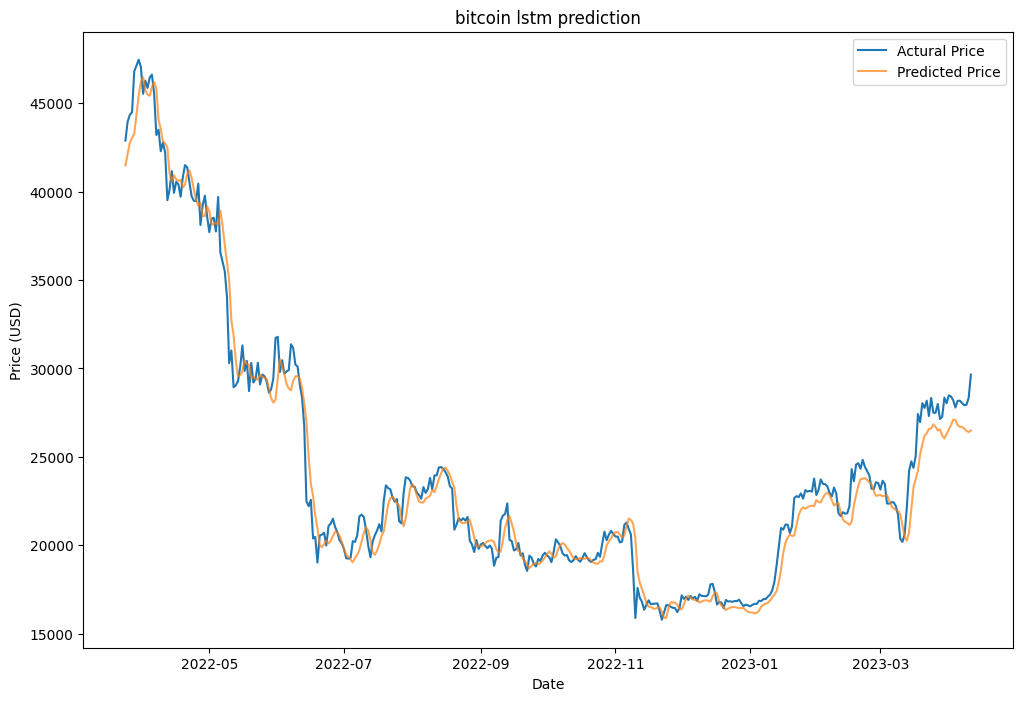

In [21]:
"""
Thi is our final model
"""
### Final model
## Model lstm 1.3 final one


model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape=(time_period, 46)))
model.add(Dropout(0.01))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.01))
#model.add(Dense(100, kernel_regularizer=l2(0.001)))
model.add(Dense(25))
#model.add(Dropout(0.05))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

#early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
model.fit(X_train, y_train, batch_size=32, epochs=35, verbose=1)
#model.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[early_stopping, model_checkpoint])

# predict
predicted_prices = model.predict(X_test)
#predicted_prices = predicted_prices.reshape(-1, 1)
predicted_prices = scaler_bitclose.inverse_transform(predicted_prices)
# analysis
from sklearn.metrics import mean_squared_error
import math

# RMSE
real_prices = scaler_bitclose.inverse_transform(y_test.reshape(-1, 1))
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f'RMSE: {rmse}')
# plot
import matplotlib.pyplot as plt
#time_axis = df_filtered_zero_copy_1[Date_lis[train_size]:-time_period-1].Date
#time_axis = pd.to_datetime(df_filtered_zero_copy_1[Date_lis[train_size]:-time_period-1].Date)
time_axis = pd.to_datetime(df_filtered_zero_copy_1[train_size+60+1:].Date)
time_axis

# plot the real price vs predicted price
plt.figure(figsize=(12, 8))
plt.plot(time_axis, real_prices, label='Actural Price')
plt.plot(time_axis, predicted_prices, label='Predicted Price', alpha=0.7)
plt.title('bitcoin lstm prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [22]:
model.history

# Find the average rmse

In [22]:
# get the average LSTM RMSE
# analysis
from sklearn.metrics import mean_squared_error
import math
best_rmse = []
for i in range(10):
  model = Sequential()
  model.add(LSTM(300, return_sequences=True, input_shape=(time_period, 46)))
  model.add(Dropout(0.01))
  model.add(LSTM(300, return_sequences=False))
  model.add(Dropout(0.01))
  #model.add(Dense(100, kernel_regularizer=l2(0.001)))
  model.add(Dense(25))
  #model.add(Dropout(0.05))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error')

  #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  #model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
  model.fit(X_train, y_train, batch_size=32, epochs=35, verbose=0)
  #model.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[early_stopping, model_checkpoint])


  # predict
  predicted_prices = model.predict(X_test)
  #predicted_prices = predicted_prices.reshape(-1, 1)
  predicted_prices = scaler_bitclose.inverse_transform(predicted_prices)

# RMSE
  real_prices = scaler_bitclose.inverse_transform(y_test.reshape(-1, 1))
  rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))
  print(f'RMSE: {rmse}')

  best_rmse.append(rmse)

12/12 [==============================] - 1s 8ms/step
RMSE: 1378.387394853774
12/12 [==============================] - 1s 6ms/step
RMSE: 1364.0103637112834
12/12 [==============================] - 1s 6ms/step
RMSE: 1036.6098213626792
12/12 [==============================] - 1s 5ms/step
RMSE: 1067.9327791948317
12/12 [==============================] - 1s 6ms/step
RMSE: 1144.880972512136
12/12 [==============================] - 1s 5ms/step
RMSE: 1081.3013548591607
12/12 [==============================] - 1s 5ms/step
RMSE: 1578.4931408417854
12/12 [==============================] - 1s 5ms/step
RMSE: 1240.134497687566
12/12 [==============================] - 1s 8ms/step
RMSE: 1264.5260227849822
12/12 [==============================] - 1s 5ms/step
RMSE: 1226.9033028454712


In [ ]:
average_lstm_best_rmse = sum(best_rmse)/len(best_rmse)
average_lstm_best_rmse

1459.6613428443577

# Summary of our final model

In [20]:
# summary of our finalemodel
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 300)           416400    
                                                                 
 dropout (Dropout)           (None, 60, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 300)               721200    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense (Dense)               (None, 25)                7525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1145151 (4.37 MB)
Trainable params: 114515

In [23]:
from sklearn.metrics import r2_score

real_prices = scaler_bitclose.inverse_transform(y_test.reshape(-1, 1))
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f'RMSE: {rmse}')
r_squared = r2_score(real_prices, predicted_prices)
print("R² value:", r_squared)

RMSE: 1122.326395789203
R² value: 0.9778557761356176


In [23]:
time_axis.shape

(384,)

,real_prices,predicted_prices
date,,
2022-03-24,42892.957031,41483.859375
2022-03-25,43960.933594,42120.796875
2022-03-26,44348.730469,42785.871094
2022-03-27,44500.828125,43045.753906
2022-03-28,46820.492188,43279.828125
...,...,...
2023-04-07,28044.140625,26701.664062
2023-04-08,27925.859375,26599.978516
2023-04-09,27947.794922,26465.207031


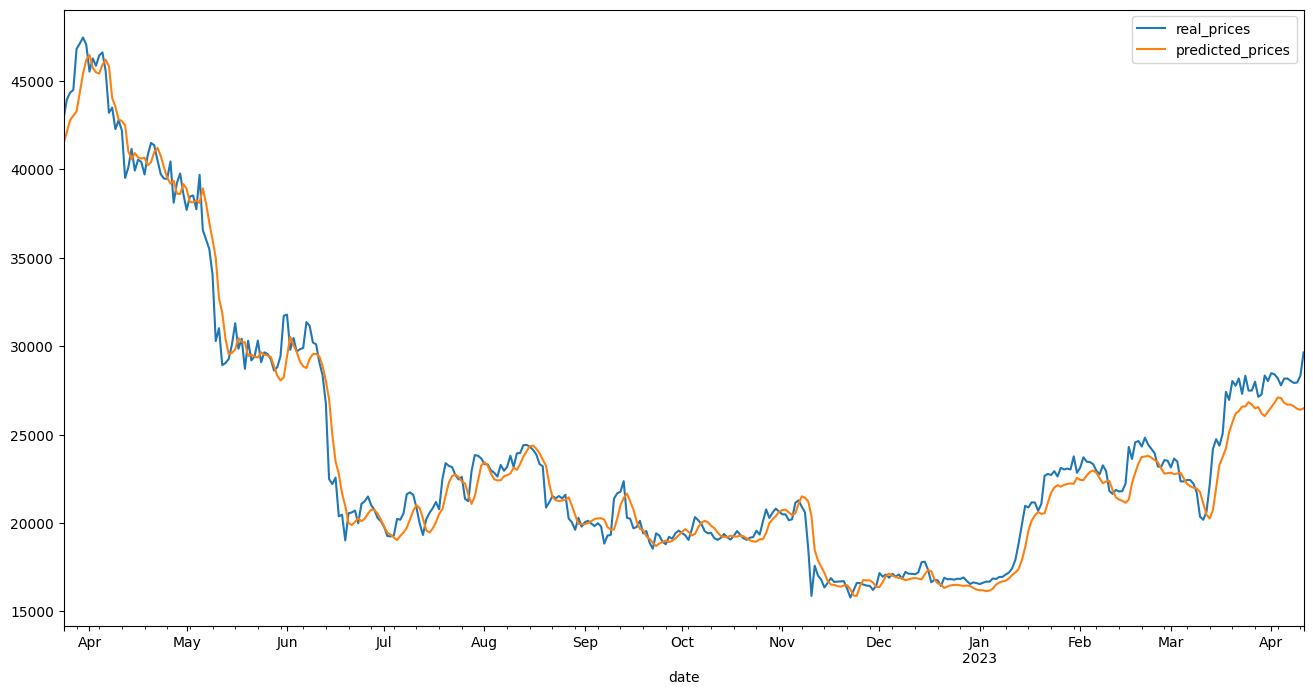

In [24]:
# ploting with date
time_axis = pd.to_datetime(df_filtered_zero_copy_1[train_size+60+1:].Date)

df_result_lstm = pd.DataFrame([[x[0] for x in real_prices],[x[0] for x in predicted_prices]]).T
df_result_lstm["date"] = time_axis.reset_index(drop=True)
df_result_lstm = df_result_lstm.set_index("date")
df_result_lstm.columns = ["real_prices", "predicted_prices"]
df_result_lstm.plot(figsize = (16,8))
df_result_lstm
#df_result_lstm[[0, 1]].plot()

### Other trys

In [ ]:
s# modeling lstm 1.4
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(time_period, 46)))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# training
history_lstm  = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
24/24 [==============================] - 5s 18ms/step - loss: 0.0309
Epoch 2/20
24/24 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 3/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 4/20
24/24 [==============================] - 0s 13ms/step - loss: 9.1804e-04
Epoch 5/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 6/20
24/24 [==============================] - 0s 13ms/step - loss: 7.9434e-04
Epoch 7/20
24/24 [==============================] - 0s 13ms/step - loss: 7.8862e-04
Epoch 8/20
24/24 [==============================] - 0s 14ms/step - loss: 9.0328e-04
Epoch 9/20
24/24 [==============================] - 0s 13ms/step - loss: 7.5900e-04
Epoch 10/20
24/24 [==============================] - 0s 13ms/step - loss: 7.4171e-04
Epoch 11/20
24/24 [==============================] - 0s 13ms/step - loss: 6.6563e-04
Epoch 12/20
24/24 [==============================] - 0s 13ms/step - loss: 6.4066e-04
Epoch

<Axes: >

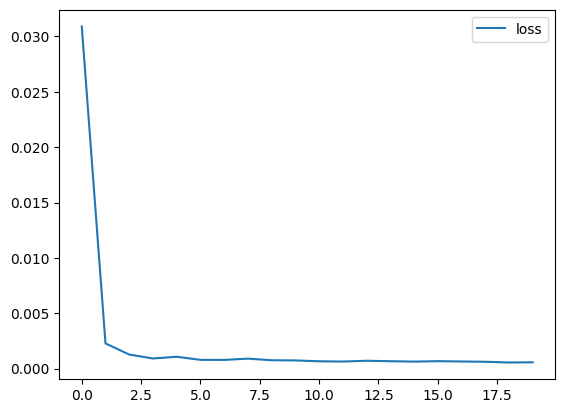

In [ ]:
pd.DataFrame(history_lstm.history).plot()

# train

In [ ]:
# training
model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1)


Epoch 1/50
24/24 [==============================] - 14s 9ms/step - loss: 0.0319
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0047
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 5/50
24/24 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 6/50
24/24 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 7/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 8/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 9/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 10/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 11/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 12/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 13/50
24/24 [=============================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 64)            8896      
                                                                 
 max_pooling1d (MaxPooling1  (None, 29, 64)            0         
 D)                                                              
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 reshape (Reshape)           (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 100)            66000     
                                                                 
 lstm_3 (LSTM)               (None, 100)              

In [ ]:
# model result
predicted_prices = model.predict(X_test)
#predicted_prices = predicted_prices.reshape(-1, 1)
predicted_prices = scaler_bitclose.inverse_transform(predicted_prices)

12/12 [==============================] - 1s 5ms/step


In [ ]:


# RMSE
real_prices = scaler_bitclose.inverse_transform(y_test.reshape(-1, 1))
rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f'RMSE: {rmse}')


RMSE: 4916.445228229574


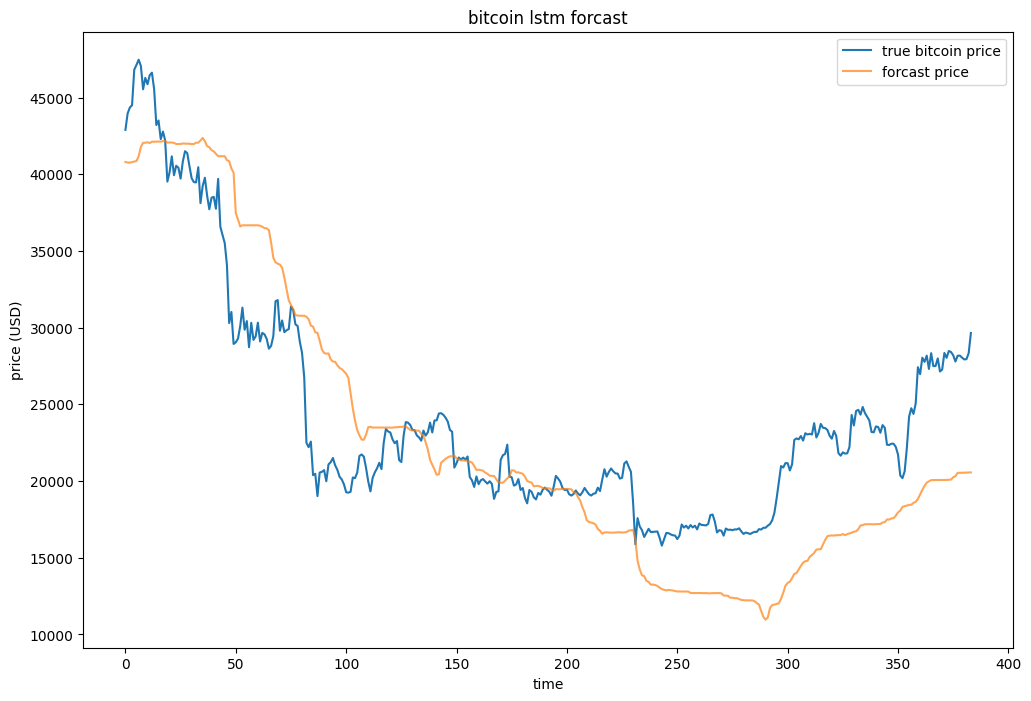

In [ ]:
# plot
import matplotlib.pyplot as plt

# plot the vs fig
plt.figure(figsize=(12, 8))
plt.plot(real_prices, label='true bitcoin price')
plt.plot(predicted_prices, label='forcast price', alpha=0.7)
plt.title('bitcoin lstm forcast')
plt.xlabel('time')
plt.ylabel('price (USD)')
plt.legend()
plt.show()


In [ ]:
df_result = pd.DataFrame(list(zip(real_prices_list,predicted_prices_list)), columns =['real_prices','predicted_prices'])
df_result

,real_prices,predicted_prices
0,42892.957031,40801.691406
1,43960.933594,40758.144531
2,44348.730469,40763.492188
3,44500.828125,40787.449219
4,46820.492188,40831.113281
...,...,...
379,28044.140625,20542.363281
380,27925.859375,20546.699219
381,27947.794922,20555.464844
382,28333.050781,20561.474609


<Axes: >

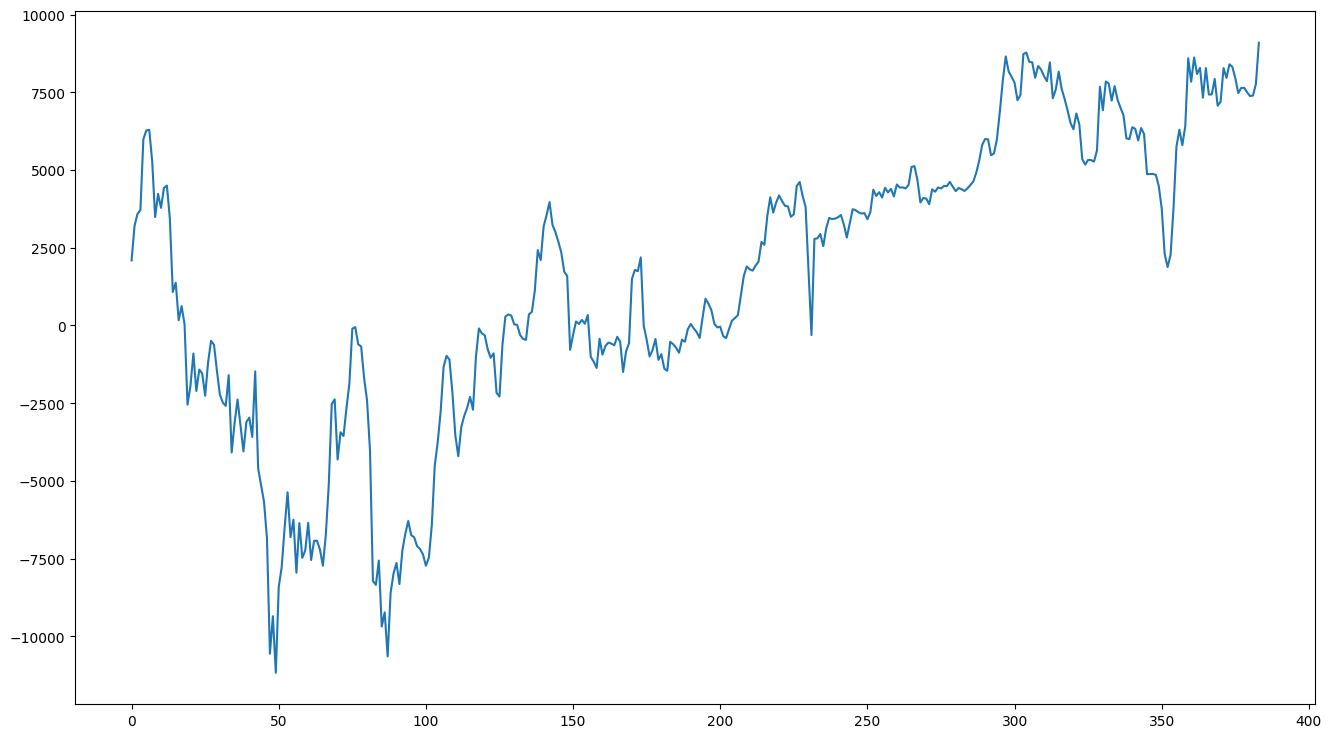

In [ ]:
df_result['differents'] = df_result['real_prices'] - df_result['predicted_prices']
df_result['differents_percentage'] = abs(df_result['differents']/df_result['real_prices'])
df_result['differents'].plot(figsize = (16,9))

# Automation programe to find best LSTM model for the target

In [ ]:
# find out the best number of neurons of the lstm


def train_and_evaluate_model(neuron_count):
    average_rmse = []
    for i in range(0,10):
        model = Sequential()
        #model.add(LSTM(neuron_count, return_sequences=True, input_shape=(time_period, 48)))
        model.add(LSTM(neuron_count, return_sequences=True, input_shape=(time_period, 46)))
        model.add(LSTM(neuron_count, return_sequences=False))
        #model.add(Dense(250))
        model.add(Dense(25))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        model.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1)

        predicted_prices = model.predict(X_test)
        predicted_prices = scaler_bitclose.inverse_transform(predicted_prices)

        real_prices = scaler_bitclose.inverse_transform(y_test.reshape(-1, 1))
        rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))
        average_rmse.append(rmse)

    rsme_mean = sum(average_rmse) / len(average_rmse)
    return rsme_mean
numbers_neuron = np.arange(1, 101,20)

neuron_counts = np.arange(10, 400,20)
#[30, 50, 70, 100, 120, 200]  # Example neuron counts to test
rmse_results = []

for count in neuron_counts:
    rmse = train_and_evaluate_model(count)
    rmse_results.append(rmse)
    print(f"Neuron Count: {count}, RMSE: {rmse}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(neuron_counts, rmse_results, marker='o')
plt.title('RMSE vs. Neuron Count')
plt.xlabel('Neuron Count')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 200)           197600    
                                                                 
 lstm_15 (LSTM)              (None, 200)               320800    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 25)                2525      
                                                                 
 dense_24 (Dense)            (None, 1)                 26        
                                                                 
Total params: 541051 (2.06 MB)
Trainable params: 541051 (2.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pd.DataFrame([neuron_counts, rmse_results]).to_csv('/content/drive/My Drive/CSCI567/data/neuron_counts_vs_avgRMSE.csv')